# IMF GDP

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
%matplotlib inline

## Helper Methods

In [3]:
def to_float(x):
    if isinstance(x, str):
        if x == '--':
            return 0.0
        return float(x.replace(',', ''))

## Data Management

In [4]:
df = pd.read_csv('WEOApr2019all.csv')

In [24]:
df.shape

(8732, 55)

In [23]:
df.head(10)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,493.073,506.215,517.858,533.394,552.063,574.127,599.933,629.88,664.452,2017.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,2.164,2.665,2.3,3,3.5,3.997,4.495,4.992,5.489,2017.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,318.48","1,377.54","1,418.13","1,488.86","1,595.05","1,733.54","1,902.11","2,096.95","2,322.65",2017.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,19.428,20.235,19.585,19.99,20.682,21.928,23.577,25.45,27.608,2017.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,66.384,69.449,72.648,76.158,80.47,85.426,91.113,97.643,105.158,2017.0
5,512,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",The GDP deflator is derived by dividing curren...,Index,NaN,"See notes for: Gross domestic product, consta...",NaN,...,267.4,272.125,273.845,279.13,288.926,301.943,317.053,332.913,349.559,2017.0
6,512,AFG,NGDPRPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant national currency...,National currency,Units,"See notes for: Gross domestic product, consta...",NaN,...,"14,227.64","14,247.51","14,376.94","14,609.52","14,920.61","15,304.27","15,775.93","16,342.44","17,012.45",2016.0
7,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2011 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,...,"1,774.19","1,776.67","1,792.81","1,821.81","1,860.60","1,908.45","1,967.26","2,037.91","2,121.46",2016.0
8,512,AFG,NGDPPC,Afghanistan,"Gross domestic product per capita, current prices",GDP is expressed in current national currency ...,National currency,Units,"See notes for: Gross domestic product, curren...",NaN,...,"38,044.70","38,770.96","39,370.50","40,779.52","43,109.55","46,210.20","50,018.12","54,406.06","59,468.51",2016.0
9,512,AFG,NGDPDPC,Afghanistan,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,...,560.601,569.531,543.724,547.507,558.976,584.529,619.996,660.299,706.871,2016.0


In [6]:
df.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
       'Country/Series-specific Notes', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024', 'Estimates Start After'],
      dtype='object')

In [79]:
years = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [7]:
df['Subject Descriptor'].unique()

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product, deflator',
       'Gross domestic product per capita, constant prices',
       'Gross domestic product per capita, current prices',
       'Output gap in percent of potential GDP',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
       'Implied PPP conversion rate', 'Total investment',
       'Gross national savings', 'Inflation, average consumer prices',
       'Inflation, end of period consumer prices',
       'Six-month London interbank offered rate (LIBOR)',
       'Volume of imports of goods and services',
       'Volume of Imports of goods',
       'Volume of exports of goods and services',
       'Volume of exports of goods', 'Unemployment rate', 'Employment',
       'Population', 'General government revenue',
       'General government total expenditure',
       'General government net lending/borrowing',

In [8]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Gui

## Charting

In [29]:
descriptors_units = [('Current account balance', 'Percent of GDP') , ('Gross national savings', 'Percent of GDP'), ('Gross domestic product, constant prices', 'Percent change')]

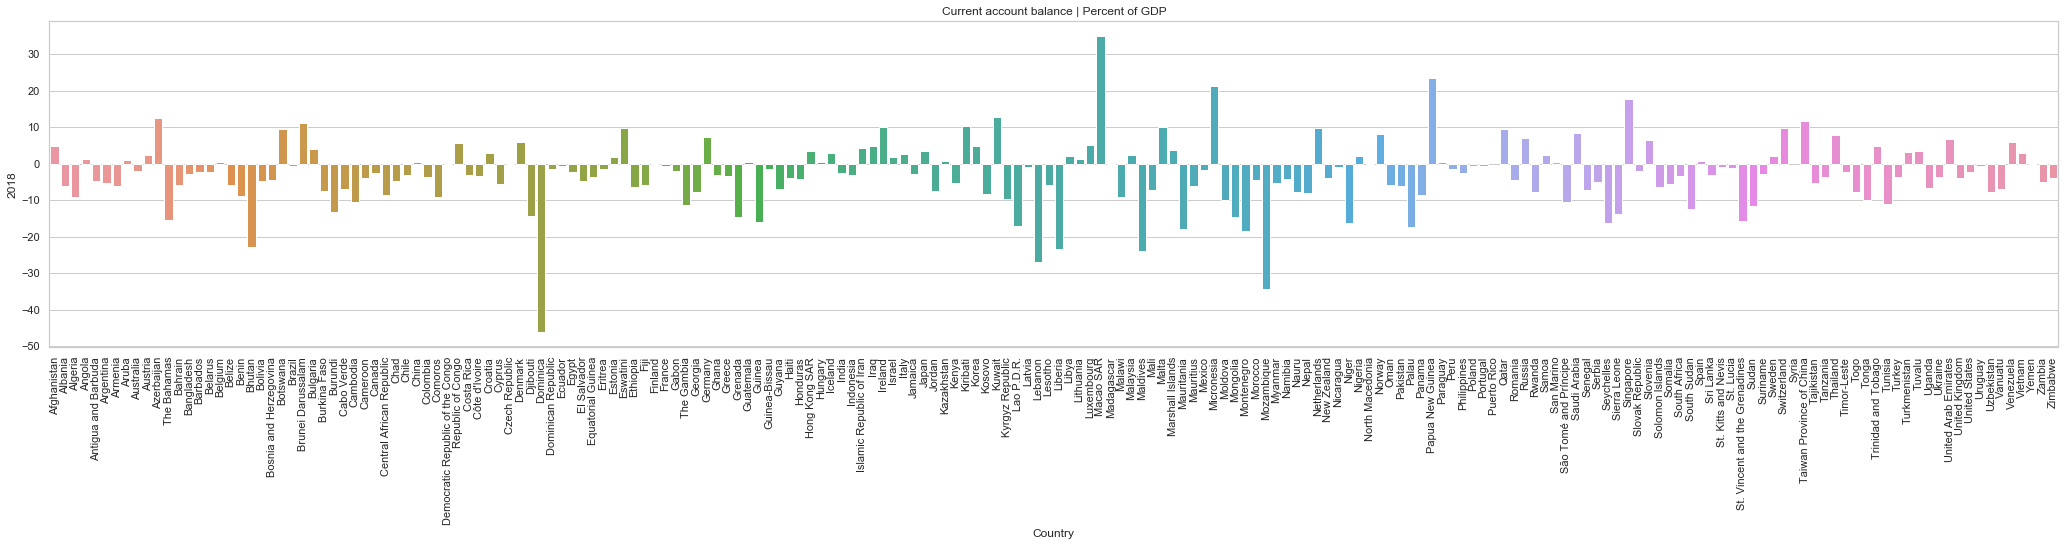

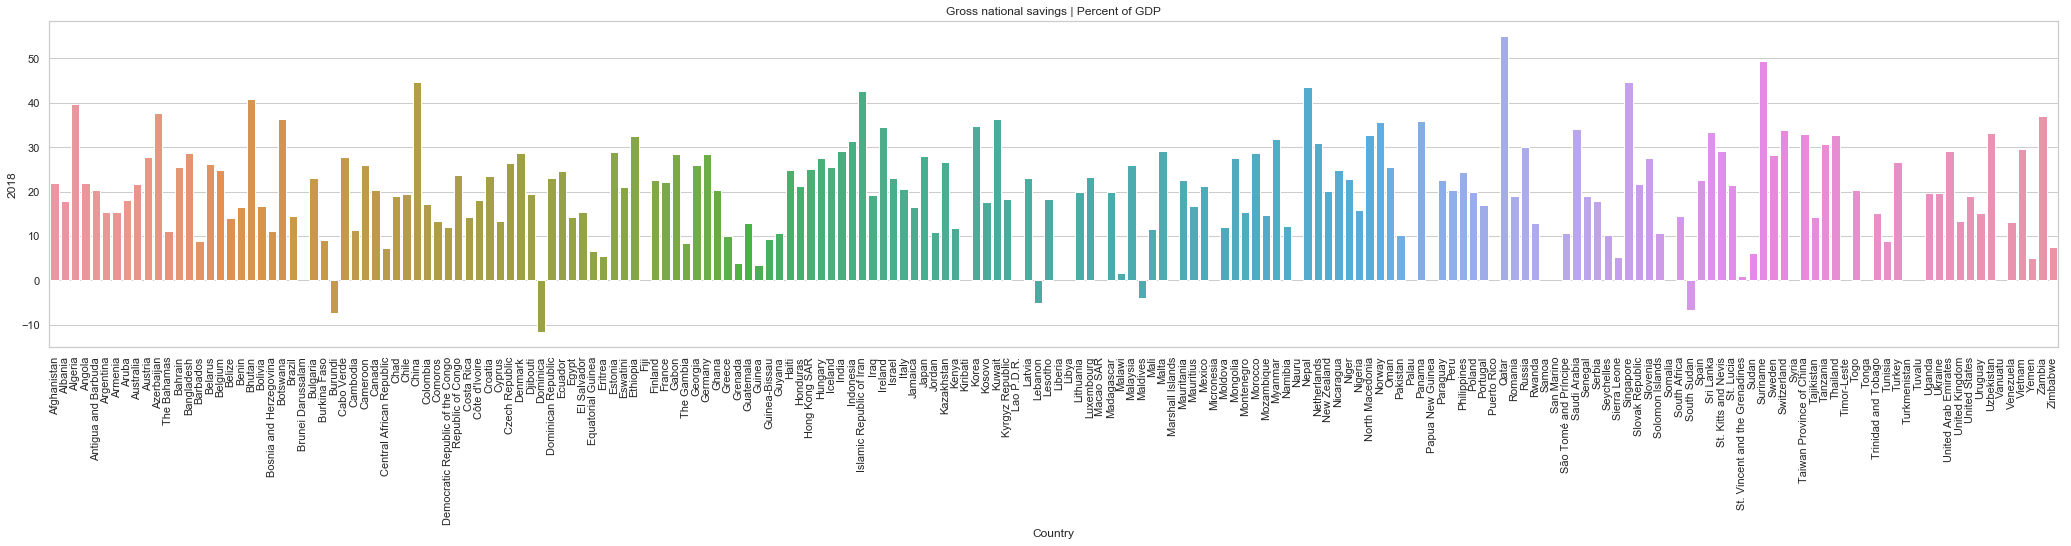

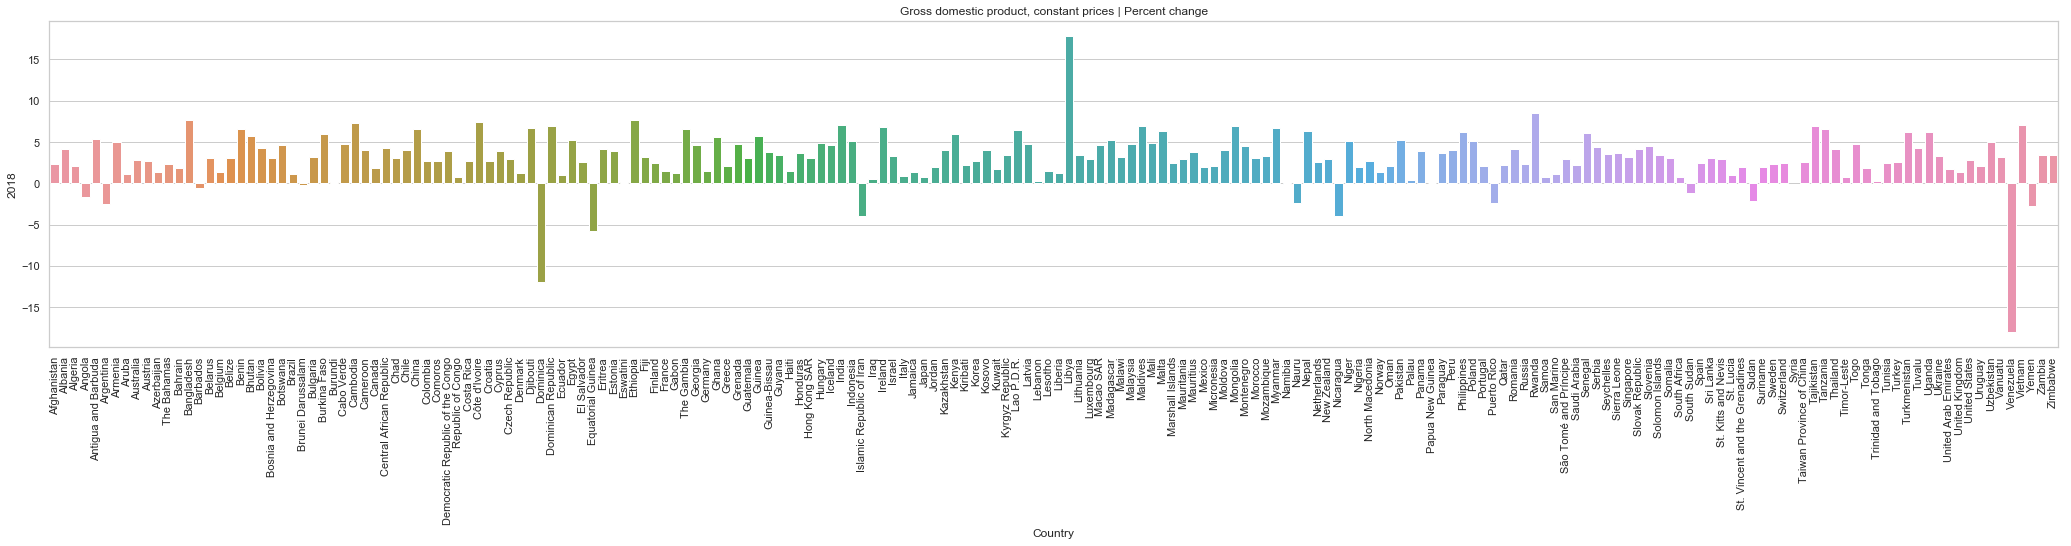

In [32]:
for descriptor_unit in descriptors_units:
    try:
        descriptor, units = descriptor_unit
        df_descriptor= df[['Country', 'Subject Descriptor', 'Units', '2018']]
        df_descriptor[(df_descriptor['Subject Descriptor'] == descriptor)].reset_index(drop=True).head()
        df_descriptor = df_descriptor[(df_descriptor['Subject Descriptor'] == descriptor) & (df_descriptor['Units'] == units)].reset_index(drop=True)
        df_descriptor['2018'] = df_descriptor['2018'].apply(to_float)
        f, ax = plt.subplots(figsize=(36, 6));
        plt.xticks(rotation=90)
        plt.title(descriptor + ' | ' + units)
        ax = sns.barplot(x="Country", y="2018", data=df_descriptor);
    except Exception:
        print('Error in charting {}'.format(descriptor + ' | ' + units))

## United Kingdom

*__BQ. How has the GDP of the United Kingdom changed over time in recent past according to IMF data? Which years the GDP growth has been good and which ones it has been poor? Can you think of reasons why this would be the case?__*

In [34]:
df_uk = df[df.Country == 'United Kingdom']

In [36]:
descriptor, units = 'Gross domestic product, constant prices', 'Percent change'

In [44]:
fields = ['Country','Subject Descriptor', 'Units']
fields.extend(years)

In [55]:
df_uk_gdp = df_uk[(df_uk['Subject Descriptor'] == descriptor) & (df_uk['Units'] == units)][fields]

In [69]:
df_uk_plot = pd.DataFrame( {descriptor + ' | ' + units : df_uk_gdp[years].values[0]}, index = years)

In [74]:
df_uk_plot[descriptor + ' | ' + units] = df_uk_plot[descriptor + ' | ' + units].apply(to_float)

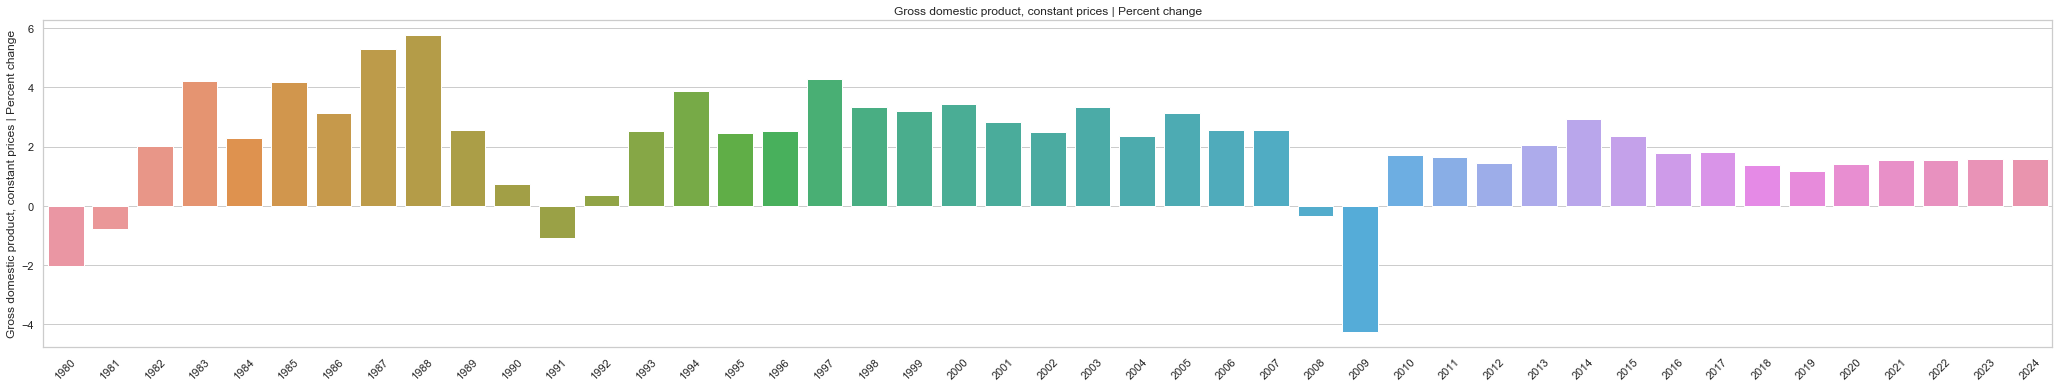

In [78]:
f, ax = plt.subplots(figsize=(36, 6));
plt.xticks(rotation=45)
plt.title(descriptor + ' | ' + units)
ax = sns.barplot(x=df_uk_plot.index.values, y='Gross domestic product, constant prices | Percent change', data=df_uk_plot)